#### Loading libraries........

In [1]:
import os                                          # to set working directory
from sklearn.neighbors import KNeighborsRegressor  # for nearest k neighbors
from sklearn import metrics                        # measures to check our models
from sklearn.model_selection import cross_val_score# cross validation methods
import numpy as np                                 # for numerical simulation(arrays and matrix)
import pandas as pd                                # DataFrames and plotting
import matplotlib.pyplot as plt                    # for plotting
from sklearn.model_selection import train_test_split # train and test split

In [2]:
%matplotlib inline

#### Setting working directory

In [3]:
os.chdir('D:/MLProject')

#### Read the data table

In [4]:
df=pd.read_csv('Yannick_analyse XRF.csv', delimiter=';') # Read a comma-separated values (csv) file into DataFrame.

In [5]:
df    # Return the first `n` rows.

,X,Y,Sn,Cr,Cu,Zn,Ni,Sb,As
0,445007.55,698394.06,55.03,0.00000,313.67718,0.00000,0.00000,0.00000,0.00000
1,444906.57,698404.99,110.40,89.49586,259.50278,52.84776,99.41629,4.37666,0.00000
2,444796.21,698405.73,145.45,51.50335,263.09462,23.72928,47.08833,7.23657,0.00000
3,444823.29,698308.58,110.56,65.78292,212.89796,12.20626,76.62371,29.43234,0.00000
4,444706.88,698242.12,142.36,69.55464,263.92579,20.23573,72.50993,0.00000,0.00000
5,444636.69,698177.74,99.26,28.89445,276.77922,13.90055,27.36412,0.99815,0.00000
6,444595.58,698100.28,95.12,37.59751,272.20779,13.83241,3.09931,37.71046,37.17305
7,444578.48,698026.34,124.20,61.87150,246.14471,6.73339,16.60117,2.84906,13.69756
8,444626.08,697947.26,150.95,74.28425,233.58813,15.40700,213.44996,1.05456,18.77628
9,444644.12,697847.86,155.48,81.33877,335.07978,5.34537,243.31784,4.07288,0.00000


#### Data visualization
Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file

In [6]:
df=df
df.describe().transpose() # Generate descriptive statistics.

,count,mean,std,min,25%,50%,75%,max
X,16.0,444742.776250,137.616809,444578.48000,444630.700000,444703.380000,444838.302500,445007.55000
Y,16.0,697977.960000,321.995100,697487.86000,697670.560000,697986.800000,698258.735000,698405.73000
Sn,16.0,125.089375,32.721907,55.03000,105.242500,126.530000,145.825000,198.94000
Cr,16.0,57.085065,28.733999,0.00000,35.421745,63.472985,74.190710,109.65637
Cu,16.0,261.369742,70.705069,136.43043,228.415588,261.298700,286.003710,416.26716
Zn,16.0,34.036269,42.420009,0.00000,10.838043,16.821365,44.907708,139.17044
Ni,16.0,108.085651,119.302809,0.00000,13.225705,74.566820,152.819667,387.09810
Sb,16.0,5.986292,11.074231,0.00000,0.000000,1.952530,4.160165,37.71046
As,16.0,7.111017,11.870629,0.00000,0.000000,0.000000,14.870205,37.17305


#### Standardizing or Normalization of the predictor features
The k-nearest neighbour method uses a nearest training sample search in feature space (like k-means clustering). To remove the impact of features range from the approach we standardize the features
* We'll standardize our predictor features to have a mean of 0 and a variance of 1
* We use the sklearn preprocessing to simplify this step and provide a reverse transform 

In [7]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.

features = ['Sn','Cr', 'Cu', 'Zn', 'Ni', 'Sb', 'As']

df['sSn'] = transform.fit_transform(df.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
df['sCr'] = transform.fit_transform(df.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0
df['sCu'] = transform.fit_transform(df.loc[:,features].values)[:,2] # standardize the data features to mean = 0, var = 1.0
df['sZn'] = transform.fit_transform(df.loc[:,features].values)[:,3] # standardize the data features to mean = 0, var = 1.0
df['sNi'] = transform.fit_transform(df.loc[:,features].values)[:,4] # standardize the data features to mean = 0, var = 1.0
df['sSb'] = transform.fit_transform(df.loc[:,features].values)[:,5] # standardize the data features to mean = 0, var = 1.0
df['sAs'] = transform.fit_transform(df.loc[:,features].values)[:,6] # standardize the data features to mean = 0, var = 1.0

In [8]:
df

,X,Y,Sn,Cr,Cu,Zn,Ni,Sb,As,sSn,sCr,sCu,sZn,sNi,sSb,sAs
0,445007.55,698394.06,55.03,0.00000,313.67718,0.00000,0.00000,0.00000,0.00000,-2.211271,-2.051827,0.764060,-0.828678,-0.935689,-0.558289,-0.618689
1,444906.57,698404.99,110.40,89.49586,259.50278,52.84776,99.41629,4.37666,0.00000,-0.463638,1.164952,-0.027271,0.458001,-0.075050,-0.150116,-0.618689
2,444796.21,698405.73,145.45,51.50335,263.09462,23.72928,47.08833,7.23657,0.00000,0.642639,-0.200625,0.025195,-0.250943,-0.528049,0.116602,-0.618689
3,444823.29,698308.58,110.56,65.78292,212.89796,12.20626,76.62371,29.43234,0.00000,-0.458588,0.312630,-0.708032,-0.531493,-0.272364,2.186605,-0.618689
4,444706.88,698242.12,142.36,69.55464,263.92579,20.23573,72.50993,0.00000,0.00000,0.545110,0.448198,0.037336,-0.336000,-0.307976,-0.558289,-0.618689
5,444636.69,698177.74,99.26,28.89445,276.77922,13.90055,27.36412,0.99815,0.00000,-0.815248,-1.013265,0.225088,-0.490242,-0.698800,-0.465200,-0.618689
6,444595.58,698100.28,95.12,37.59751,272.20779,13.83241,3.09931,37.71046,37.17305,-0.945918,-0.700448,0.158312,-0.491901,-0.908859,2.958632,2.615526
7,444578.48,698026.34,124.20,61.87150,246.14471,6.73339,16.60117,2.84906,13.69756,-0.028071,0.172040,-0.222393,-0.664740,-0.791974,-0.292582,0.573057
8,444626.08,697947.26,150.95,74.28425,233.58813,15.40700,213.44996,1.05456,18.77628,0.816234,0.618196,-0.405809,-0.453565,0.912131,-0.459939,1.014928
9,444644.12,697847.86,155.48,81.33877,335.07978,5.34537,243.31784,4.07288,0.00000,0.959214,0.871759,1.076689,-0.698534,1.170695,-0.178447,-0.618689


In [9]:
df.describe().T   # Describe summary statistics

,count,mean,std,min,25%,50%,75%,max
X,16.0,4.447428e+05,137.616809,444578.480000,444630.700000,444703.380000,444838.302500,445007.550000
Y,16.0,6.979780e+05,321.995100,697487.860000,697670.560000,697986.800000,698258.735000,698405.730000
Sn,16.0,1.250894e+02,32.721907,55.030000,105.242500,126.530000,145.825000,198.940000
Cr,16.0,5.708507e+01,28.733999,0.000000,35.421745,63.472985,74.190710,109.656370
Cu,16.0,2.613697e+02,70.705069,136.430430,228.415588,261.298700,286.003710,416.267160
Zn,16.0,3.403627e+01,42.420009,0.000000,10.838043,16.821365,44.907708,139.170440
Ni,16.0,1.080857e+02,119.302809,0.000000,13.225705,74.566820,152.819667,387.098100
Sb,16.0,5.986292e+00,11.074231,0.000000,0.000000,1.952530,4.160165,37.710460
As,16.0,7.111017e+00,11.870629,0.000000,0.000000,0.000000,14.870205,37.173050
sSn,16.0,2.983724e-16,1.032796,-2.211271,-0.626423,0.045470,0.654475,2.330934


In [10]:
Invfeatures = ['sSn','sCr', 'sCu', 'sZn', 'sNi', 'sSb', 'sAs']
transform.inverse_transform(df.loc[:,Invfeatures])

array([[ 5.50300000e+01, -7.10542736e-15,  3.13677180e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.88178420e-16],
       [ 1.10400000e+02,  8.94958600e+01,  2.59502780e+02,
         5.28477600e+01,  9.94162900e+01,  4.37666000e+00,
        -8.88178420e-16],
       [ 1.45450000e+02,  5.15033500e+01,  2.63094620e+02,
         2.37292800e+01,  4.70883300e+01,  7.23657000e+00,
        -8.88178420e-16],
       [ 1.10560000e+02,  6.57829200e+01,  2.12897960e+02,
         1.22062600e+01,  7.66237100e+01,  2.94323400e+01,
        -8.88178420e-16],
       [ 1.42360000e+02,  6.95546400e+01,  2.63925790e+02,
         2.02357300e+01,  7.25099300e+01,  0.00000000e+00,
        -8.88178420e-16],
       [ 9.92600000e+01,  2.88944500e+01,  2.76779220e+02,
         1.39005500e+01,  2.73641200e+01,  9.98150000e-01,
        -8.88178420e-16],
       [ 9.51200000e+01,  3.75975100e+01,  2.72207790e+02,
         1.38324100e+01,  3.09931000e+00,  3.77104600e+01,
         3.7173050

We can compare the output above with the original features=[Sn, Cr, Cu, Zn, Ni, Sb, As]. The reverse transform works! We will use it to return to the original feature units.

#### Feature Ranges

Let's set some ranges for plotting. Note for the standardized predictor features we will use -3.5 to 3.5 as the limits.

In [11]:
#df_s=pd.DataFrame(transform.inverse_transform(df.loc[:,Invfeatures]))
#df_s

In [12]:

Snmin = 55.0    ; Snmax = 200.0                                  # set minimums and maximums for visualization 
Crmin = 0.0     ; Crmax = 110.0
Cumin = 136.0   ; Cumax = 417.0
Znmin = 0.0     ; Znmax = 140.0
Nimin = 0.0     ; Nimax = 388.0
Sbmin = 0.0     ; Sbmax = 38.0
Asmin = 0.0     ; Asmax = 38.0

In [13]:
corr_matrix = np.corrcoef(df.iloc[:,0:9], rowvar=False)
print(np.around(corr_matrix, 2)) # Evenly round to the given number of decimals.

[[ 1.    0.14 -0.18  0.18 -0.41  0.42  0.33 -0.12 -0.31]
 [ 0.14  1.   -0.4  -0.24  0.16 -0.48 -0.53  0.3  -0.21]
 [-0.18 -0.4   1.    0.74 -0.37  0.48  0.65 -0.18 -0.18]
 [ 0.18 -0.24  0.74  1.   -0.64  0.57  0.79 -0.01 -0.1 ]
 [-0.41  0.16 -0.37 -0.64  1.   -0.73 -0.53 -0.12 -0.03]
 [ 0.42 -0.48  0.48  0.57 -0.73  1.    0.57 -0.15 -0.22]
 [ 0.33 -0.53  0.65  0.79 -0.53  0.57  1.   -0.19 -0.  ]
 [-0.12  0.3  -0.18 -0.01 -0.12 -0.15 -0.19  1.    0.4 ]
 [-0.31 -0.21 -0.18 -0.1  -0.03 -0.22 -0.    0.4   1.  ]]


Note the 1.0 diagonal resulting from the correlation of each variable with themselves.

###### Let's use our function declared above to make a graphical correlation matrix visualization. This may inprove our ability to spot features. It relies on the built in correlation matrix method with Numpy DataFrames and MatPlotLib for plotting.

In [14]:

def plot_corr(dataframe,size=10):                               # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

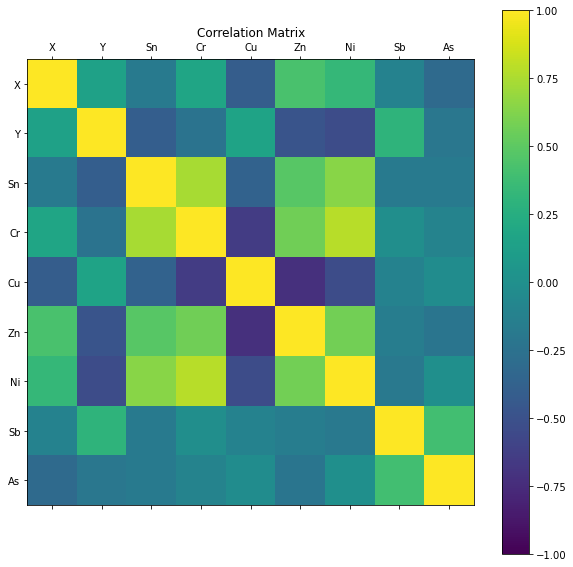

In [15]:
plot_corr(df.iloc[:,0:9],size=10)                                       # using our correlation matrix visualization function
plt.show()

In [16]:
import pandas.plotting as pd_plot

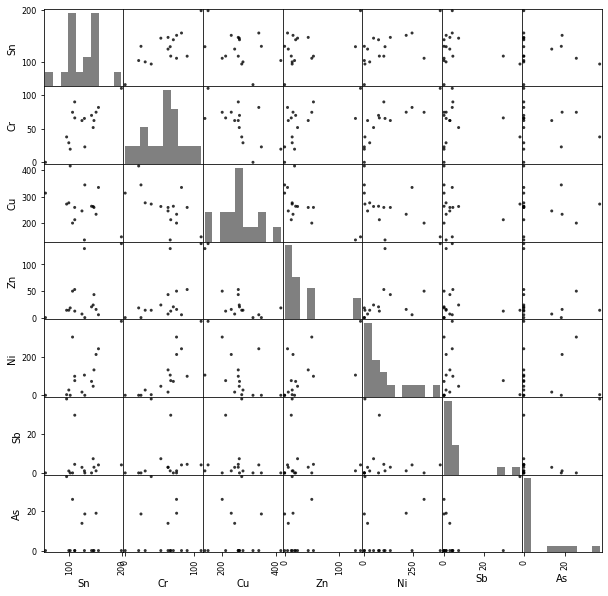

In [17]:

pd_plot.scatter_matrix(df.iloc[:,2:9] , alpha = 0.8,                # pandas matrix scatter plot
    figsize=(10, 10),color = 'black', hist_kwds={'color':['grey']})
plt.show()

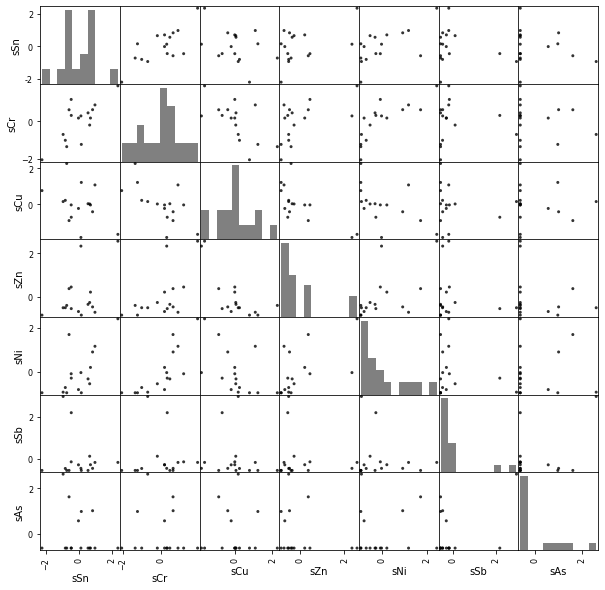

In [18]:
pd_plot.scatter_matrix(df.iloc[:,9:] , alpha = 0.8,                # pandas matrix scatter plot
    figsize=(10, 10),color = 'black', hist_kwds={'color':['grey']})
plt.show()

#### Working with only two features

Predictor features, Zn, Ni, Cu to predict Cr . By working with only 3 features, it is very easy to visualize the segmentation of the feature space (it is only 2D and can be shown compleltely on a single plot).

 Metals and metalloids type pollutants :(arsenic, cadmium, chrome, cuivre, mercure, nickel, plomb et zinc)

###### Train, test splitting

In [19]:
df_subset = df.iloc[:,[3,11,12,13]]                    # extract just  Cr, sCu, sZn, sNi samples
X_train, X_test, y_train, y_test = train_test_split(df_subset.iloc[:,[1,2]], df_subset.iloc[:,0], test_size=0.2, random_state=64)
y_train = pd.DataFrame({'Cr':y_train.values})
y_test = pd.DataFrame({'Cr':y_test.values})

##### Univariate statistics  checking of Cr, Cu and Zn samples

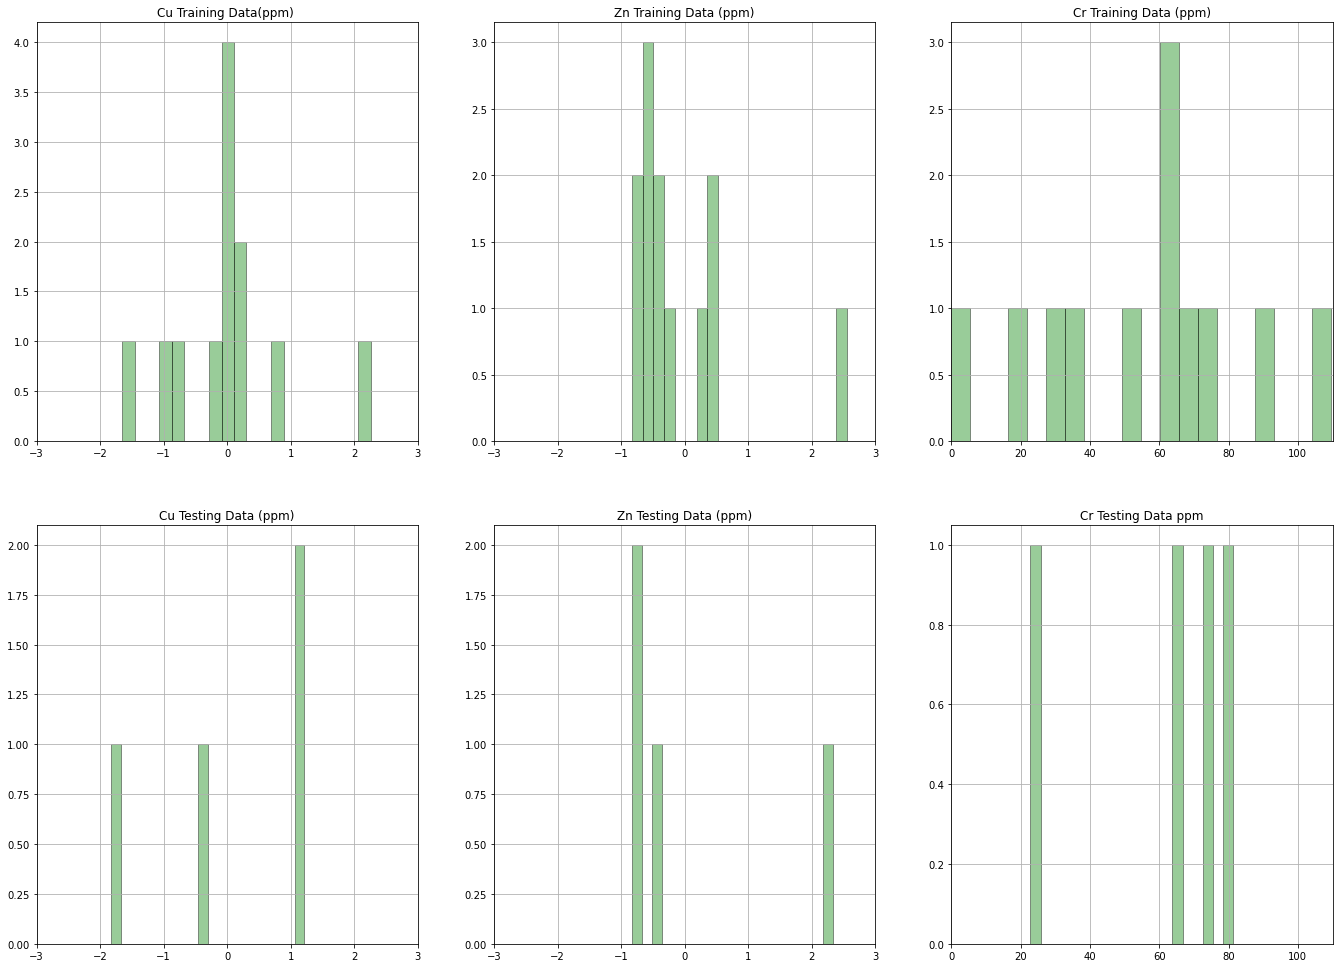

In [20]:
plt.subplot(231)
plt.grid()
plt.hist(X_train["sCu"], alpha = 0.4, color = 'green', edgecolor = 'black', bins=20)
plt.title('Cu Training Data(ppm) '); plt.xlim(-3,3)

plt.subplot(232)
plt.grid()
plt.hist(X_train["sZn"], alpha = 0.4, color = 'green', edgecolor = 'black', bins=20)
plt.title('Zn Training Data (ppm)'); plt.xlim(-3,3)

plt.subplot(233)
plt.grid()
plt.hist(y_train['Cr'], alpha = 0.4, color = 'green', edgecolor = 'black', bins=20)
plt.title('Cr Training Data (ppm)'); plt.xlim(Crmin,Crmax)

plt.subplot(234)
plt.grid()
plt.hist(X_test["sCu"], alpha = 0.4, color = 'green', edgecolor = 'black', bins=20)
plt.title('Cu Testing Data (ppm)'); plt.xlim(-3,3)

plt.subplot(235)
plt.grid()
plt.hist(X_test["sZn"], alpha = 0.4, color = 'green', edgecolor = 'black', bins=20)
plt.title('Zn Testing Data (ppm)'); plt.xlim(-3,3)

plt.subplot(236)
plt.grid()
plt.hist(y_test['Cr'], alpha = 0.4, color = 'green', edgecolor = 'black', bins=20)
plt.title('Cr Testing Data ppm'); plt.xlim(Crmin,Crmax)


plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

The distributions aren't well behaved, we cannot observe obvious gaps and truncations. Let's look at a scatter plot of Cu vs. Zn with points colored by Cr.

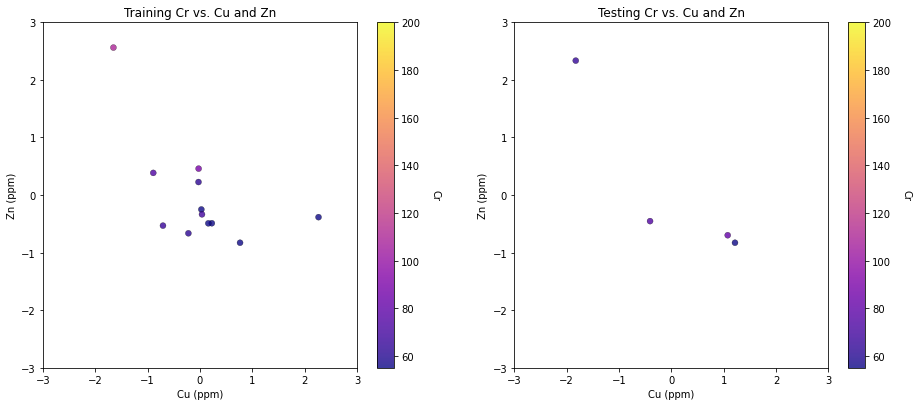

In [21]:

plt.subplot(121)
im = plt.scatter(X_train["sCu"],X_train["sZn"],s=None, c=y_train['Cr'], marker=None, cmap=plt.cm.plasma, norm=None, vmin=Snmin, vmax=Snmax, alpha=0.8, linewidths=0.3,  edgecolors="black")
plt.title('Training Cr vs. Cu and Zn'); plt.xlabel('Cu (ppm)'); plt.ylabel('Zn (ppm)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Cr", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test["sCu"],X_test["sZn"],s=None, c=y_test['Cr'], marker=None, cmap=plt.cm.plasma, norm=None, vmin=Snmin, vmax=Snmax, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Testing Cr vs. Cu and Zn'); plt.xlabel('Cu (ppm)'); plt.ylabel('Zn (ppm)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Cr", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

 This problem looks complicated and could not be modeled with simple linear regression. It appears there is a sweet spot for Cu and increasing Zn is always beneficial for identifying Cr Pollute zone.

Instantiate, Fit and Predict with    Nearest Neighbour
Let's instantiate, fit and predict with a  $𝑘$  nearest neighbour model.

instantiate it with the hyperparameters,  $k$ nearest neighbours

train with the training data, we use the standard fit function from scikit learn

In [22]:
neigh = KNeighborsRegressor(n_neighbors=5, weights='uniform', p = 1, metric='minkowski') # instantiate the prediction model

In [23]:
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.plasma
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)

We have set the hyperparameters:

***weights*** = averaging weights for the prediction given the nearest neighbours. ***'uniform'*** is arithmetic average, while 'distance' is inverse distance weighting.

***n_neighbours = maximum number of neighbours***. Note, we constrain our prediction by limiting it to 5 nearest neighbours.

***p = distance metric power or Minkowsi metric*** (***1 = Manhattan distance***, ***2 for Euclidian distance***) for finding the nearest neighbours.

Now we are ready to fit our model for prediction of Chrome pollute Zone given Cu and Zn.

We will use our two functions defined to visualize the  𝑘  nearest neighbour prediction over the feature space and the cross plot of actual and estimated Chrome for the training data along with three model metrics from the sklearn.metric module.

In [24]:
neigh_fit = neigh.fit(X_train,y_train['Cr'])              # train the model with the training data

C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


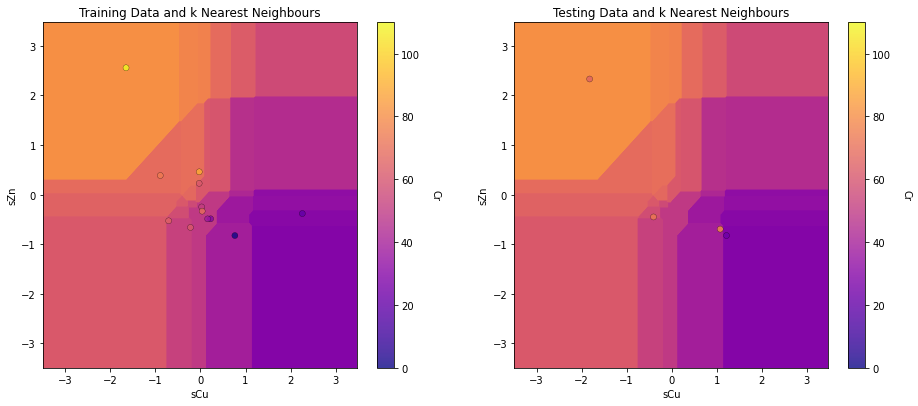

In [25]:
plt.subplot(121)
visualize_model(neigh_fit,X_train["sCu"],-3.5,3.5,X_train["sZn"],-3.5,3.5,y_train["Cr"],Crmin,Crmax,'Training Data and k Nearest Neighbours')

plt.subplot(122)
visualize_model(neigh_fit,X_test["sCu"],-3.5,3.5,X_test["sZn"],-3.5,3.5,y_test["Cr"],Crmin,Crmax,'Testing Data and k Nearest Neighbours')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [26]:
def check_model(model,xfeature,yfeature,response,title):    # plots the estimated vs. the actual  
    predict_train = model.predict(np.c_[xfeature,yfeature])
    plt.scatter(response,predict_train,s=None, c='turquoise',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
    plt.title(title); plt.xlabel('Cr(ppm)'); plt.ylabel('Estimated Sn(ppm)')
    plt.xlim(0,300); plt.ylim(0,300)
    plt.arrow(0,0,700,700,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE = metrics.mean_squared_error(response,predict_train)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = np.sqrt(metrics.r2_score(response,predict_train))
    print('Mean Squared Error on Training = ', round(MSE,2),', Variance Explained =', round(Var_Explained,2),'Cor =', round(cor,2))

The model looks good:

the nonparametric approach is quite flexible to fit the nonlinear response patterns in the predictor feature space

we can see some search artifacts due to limited k nearest data and the use of uniform weighting

note the oblic lines, this is due to the difference in range of the two features resulting in Zn differences having more weight - we could consider standarizing the features to have the same range or variance to assign equal importance

Let's go ahead and look at the cross validation results.

C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr what\AppData\Local\Temp\ipykernel_12128\4281894048.py:9: RuntimeWarning: invalid value encountered in sqrt
  cor = np.sqrt(metrics.r2_score(response,predict_train))


Mean Squared Error on Training =  353.54 , Variance Explained = 0.59 Cor = 0.77
Mean Squared Error on Training =  577.26 , Variance Explained = 0.05 Cor = nan


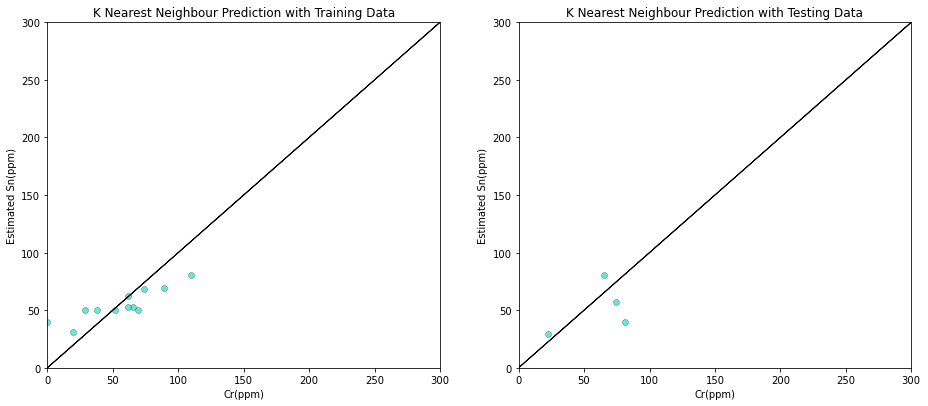

In [27]:
plt.subplot(121)
check_model(neigh_fit,X_train["sCu"],X_train["sZn"],y_train["Cr"],'K Nearest Neighbour Prediction with Training Data')

plt.subplot(122)
check_model(neigh_fit,X_test["sCu"],X_test["sZn"],y_test["Cr"],'K Nearest Neighbour Prediction with Testing Data')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

The training performed well and the testing even a little better! Is this expected? Yes.

we have dense data for this low dimensional problem (only 2 predictor features)

the testing and training data are consistent and close to each other in the predictor feature space

Let's repeat with inverse distance weighting.

C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


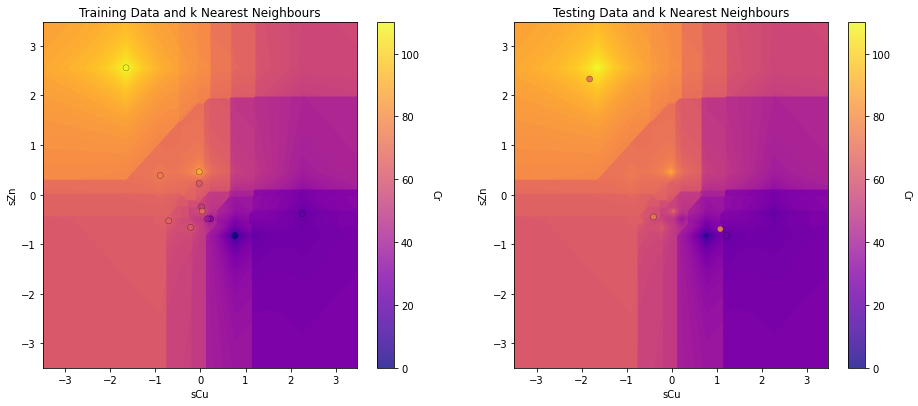

In [28]:
neigh = KNeighborsRegressor(weights = 'distance', n_neighbors=5, p = 1)

neigh_fit = neigh.fit(X_train,y_train['Cr'])              # train the model with the training data

plt.subplot(121)
visualize_model(neigh_fit,X_train["sCu"],-3.5,3.5,X_train["sZn"],-3.5,3.5,y_train["Cr"],Crmin,Crmax,'Training Data and k Nearest Neighbours')

plt.subplot(122)
visualize_model(neigh_fit,X_test["sCu"],-3.5,3.5,X_test["sZn"],-3.5,3.5,y_test["Cr"],Crmin,Crmax,'Testing Data and k Nearest Neighbours')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


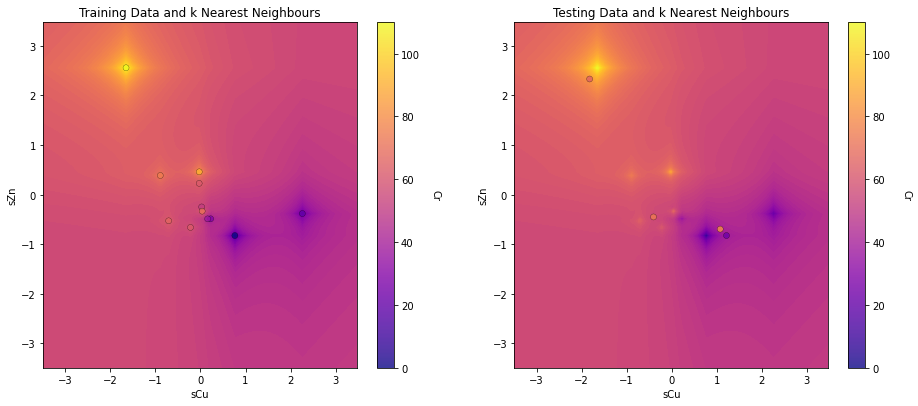

In [29]:
neigh = KNeighborsRegressor(weights = 'distance', n_neighbors=12, p = 1)

neigh_fit = neigh.fit(X_train,y_train['Cr'])              # train the model with the training data

plt.subplot(121)
visualize_model(neigh_fit,X_train["sCu"],-3.5,3.5,X_train["sZn"],-3.5,3.5,y_train["Cr"],Crmin,Crmax,'Training Data and k Nearest Neighbours')

plt.subplot(122)
visualize_model(neigh_fit,X_test["sCu"],-3.5,3.5,X_test["sZn"],-3.5,3.5,y_test["Cr"],Crmin,Crmax,'Testing Data and k Nearest Neighbours')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Now we are getting a much more smooth set of predictions over the predictor feature space.

There is much more that could be attempted like working with other weighting (for calculating the predicted response feature) and distance metrics (for pooling the k nearest neighbours).
Let's go extreme and check out the model with only the nearest neighbour,  𝑘=1.

C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr what\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


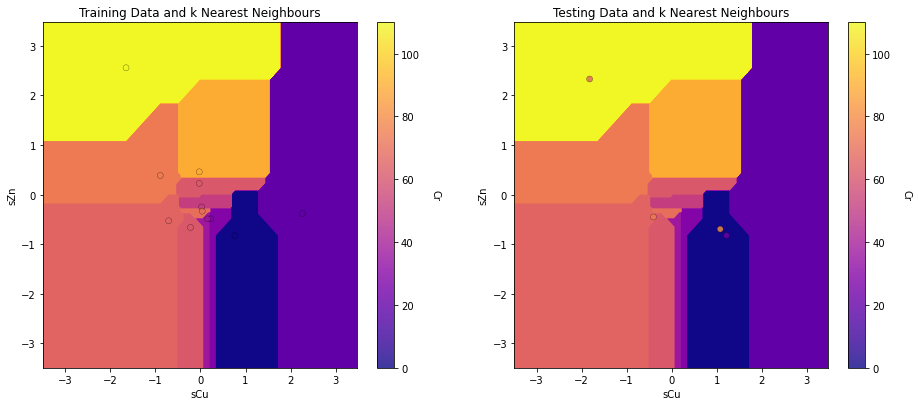

In [30]:

neigh = KNeighborsRegressor(weights = 'distance', n_neighbors=1, p = 1)

neigh_fit = neigh.fit(X_train,y_train['Cr'])              # train the model with the training data

plt.subplot(121)
visualize_model(neigh_fit,X_train["sCu"],-3.5,3.5,X_train["sZn"],-3.5,3.5,y_train["Cr"],Crmin,Crmax,'Training Data and k Nearest Neighbours')

plt.subplot(122)
visualize_model(neigh_fit,X_test["sCu"],-3.5,3.5,X_test["sZn"],-3.5,3.5,y_test["Cr"],Crmin,Crmax,'Testing Data and k Nearest Neighbours')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

This model is very fit the local training data in the predictor feature space, it is likely overfit. Let's check this out as we tune the hyper parameters.

So what does the  𝑘  do?

small  𝑘  hyperparameter results in a local specfic prediction model over the predictor feature space

large  𝑘  hyperparameter results in a more smooth, globally fit prediction model over the predictor features space

This is analogous to the low to high complexity we have obseved with other models (like decision trees).

small  𝑘  is complex

large  𝑘  is simple

We need to tune the complexity to optimize model performance.

Tuning the Hyperparameters
Let's loop over multiple  𝑘k  nearest neighbours for average and inverse distance estimates to access the best hyperparameters with respect to accuracy in testing.

In [31]:
k = 1
dist_error = []
unif_error = []
k_mat = np.linspace(1,12,12)
while k <= 12:
    neigh_dist = KNeighborsRegressor(weights = 'distance', n_neighbors=k, p = 1)
    neigh_dist_fit = neigh_dist.fit(X_train,y_train['Cr'])    # train the model with the training data
    y_pred = neigh_dist_fit.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    dist_error.append(MSE)
    
    neigh_unif = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 1)
    neigh_unif_fit = neigh_unif.fit(X_train,y_train['Cr'])    # train the model with the training data
    y_pred = neigh_unif_fit.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    unif_error.append(MSE)
    k = k + 1

Plotting result

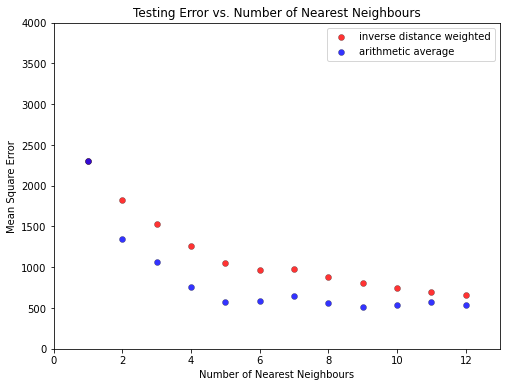

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(k_mat,dist_error,s=None, c='red',label = 'inverse distance weighted', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.scatter(k_mat,unif_error,s=None, c='blue',label = 'arithmetic average', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3,  edgecolors="black")
plt.title('Testing Error vs. Number of Nearest Neighbours'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error')
plt.legend()
plt.xlim(0,13); plt.ylim(0,4000)
plt.show()

What can we observe from this result?

* at $k = 5$ nearest neighbours we minimize the mean square error in testing.

* we have better performance with the inverse distance weighted than the arithmetic average (uniform weighting of k nearest training data in predictor feature space)

There is an optimum degree of specifivity / complexity to our model.  

* 1 nearest neighbour is a very locally specific model (overfit)

* many nearest neighbours includes too much information and is too general (underfit)

We are observing the accuracy vs. complexity trade-off for the $k$ nearest neighbour model.

#### k-fold Cross Validation

It is useful to evaluate the performance of our model by observing the accuracy vs. complexity trade-off.   

Yet, what we really want to do is rigorously test our model performance.  We should perform a more rigorous cross validation that does a better job evaluating over different sets of training and testing data. scikit learn has a built in cross validation method called cross_val_score that we can use to:

1. Apply k-fold approach with iterative separation of training and testing data
2. Automate the model construction, looping over folds and averaging the metric of interest

Let's try it out on our k nearest neighbour prediction with variable number of $k$ nearest neighbours.  Note the cross validation is set to use 4 processors, but still will likely take a couple of minutes to run.

In [33]:
score = []                                                  # code modified from StackOverFlow by Dimosthenis
k_mat = []
for k in range(1,15):
    neigh_dist = KNeighborsRegressor(weights = 'distance', n_neighbors=k, p = 1)
    scores = cross_val_score(estimator=neigh_dist, X= np.c_[df['sCu'],df['sZn']],y=df['Cr'], cv=2, n_jobs=4,scoring = "neg_mean_squared_error") # Perform 7-fold cross validation
    score.append(abs(scores.mean()))
    k_mat.append(k)

The output is an array of average scores (MSE) over the k-folds for each level of complexity (number of $k$ nearest neighbours), along with an array with the $k$s.

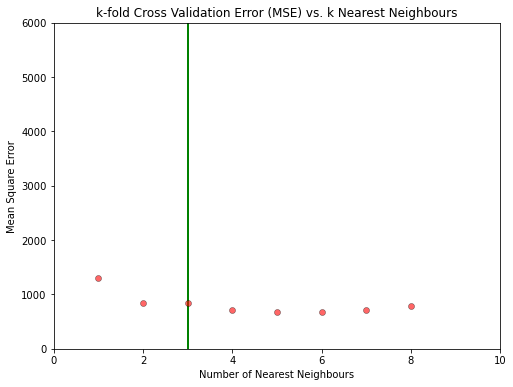

In [34]:
plt.figure(figsize=(8,6))
plt.arrow(3,0,0,1500000,width=0.02,color='green',head_length=0.0,head_width=0.0)
plt.scatter(k_mat,score,s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=0.5, edgecolors="black")
plt.title('k-fold Cross Validation Error (MSE) vs. k Nearest Neighbours'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error')
plt.xlim(0,10); plt.ylim(0,6000)
plt.show()

It is clear that at about 3 nearest neighbours we get the greatest accuracy in k fold cross validation model testing.

* 10 folds of k-fold cross validation

* we could select 2 nearest neighbours for making future predictions

#### Predictor Feature Standardization

We have standardized the predictor feature to remove the influence of their ranges.


In [35]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilité, visualisation 
import geostatspy.geostats as geostats    # GSLIB methods convert to Python


In [36]:
neigh = KNeighborsRegressor(weights = 'distance', n_neighbors=10, p = 2)

neigh_fit = neigh.fit(X_train,y_train['Cr'])              # train the model with the training data



In [37]:
df['X']

0     445007.55
1     444906.57
2     444796.21
3     444823.29
4     444706.88
5     444636.69
6     444595.58
7     444578.48
8     444626.08
9     444644.12
10    444605.00
11    444632.24
12    444699.88
13    444810.27
14    444883.34
15    444932.24
Name: X, dtype: float64

In [44]:
neigh.fit(X_train, y_train['Cr'])

sklearn.neighbors._regression.KNeighborsRegressor